In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('data.csv')
df.head()

In [ ]:
sns.scatterplot(df['Sum'], df['Days']);

In [ ]:
data = df[['Sum', 'Days']]

n_clusters = list(range(2, 7))
metrics = []

for k in n_clusters:
  km = KMeans(n_clusters=k).fit(data)
  score = silhouette_score(data, km.labels_)
  metrics.append(score)

In [ ]:
sns.lineplot(n_clusters, metrics);


In [ ]:

print('\n' * 20)

# Видео 2

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('14.2 data.csv')
df.head()

,Sum,Days,Color
0,22.072345,36.758307,1
1,37.936710,55.784810,1
2,21.083576,47.319176,1
3,31.120670,54.406780,1
4,43.711550,42.557729,1


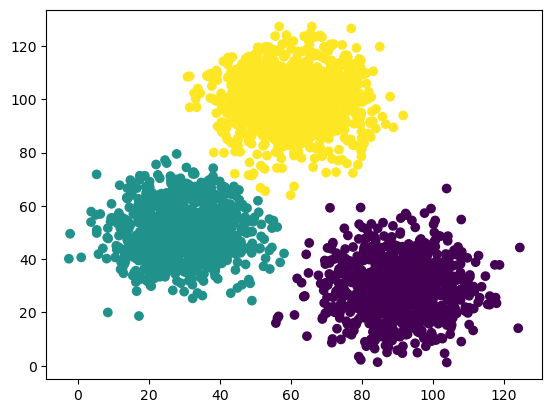

In [3]:
plt.scatter(df['Sum'], df['Days'], c=df.Color)#, hue=df['Color'])


In [4]:
features = ['Sum', 'Days']

df_g = df.groupby('Color').agg({x: ['mean', 'std'] for x in features}).T
df_g

Color              0          1          2
Sum  mean  89.924184  29.311610  60.623093
     std   10.463459  10.052721  10.166339
Days mean  29.880359  50.541746  99.530350
     std   10.324979   9.704615   9.954158

In [5]:
import numpy as np

functions = ['mean', 'std']

stat = np.array([[df[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

Color              0          1          2     Global
Sum  mean  89.924184  29.311610  60.623093  60.611358
     std   10.463459  10.052721  10.166339  25.859054
Days mean  29.880359  50.541746  99.530350  62.862141
     std   10.324979   9.704615   9.954158  31.759714

In [6]:
cluster_labels = [0, 1, 2]

for label in cluster_labels:
    df_g_rel[label] = 100 * df_g_rel[label] / df_g_rel['Global'] - 100

df_g_rel

Color              0          1          2     Global
Sum  mean  48.361935 -51.640071   0.019361  60.611358
     std  -59.536575 -61.124946 -60.685573  25.859054
Days mean -52.466845 -19.599070  58.331148  62.862141
     std  -67.490329 -69.443634 -68.657911  31.759714

<AxesSubplot:xlabel='Color', ylabel='None-None'>

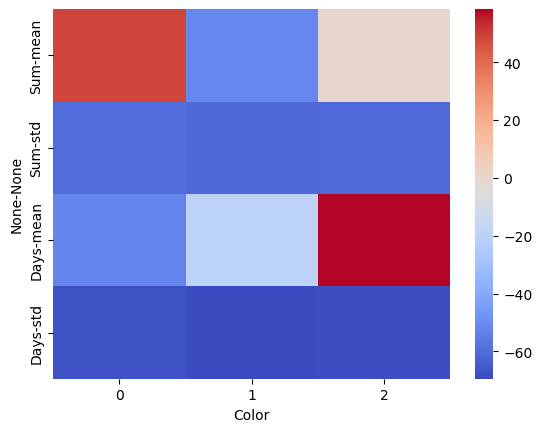

In [7]:
sns.heatmap(df_g_rel[cluster_labels], cmap='coolwarm')

# Видео 3

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('st900.csv')
df.head()

In [ ]:
df.shape

In [ ]:
km = KMeans(n_clusters=4).fit(df)
labels = km.labels_

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20)
df_emb = tsne.fit_transform(df)
data = pd.DataFrame(df_emb)
data

In [ ]:
sns.scatterplot(data[0], data[1], hue=labels)